 # Using PointChargeCEF to fit INS of TmMgGaO$_{4}$
By Zhiling Dun, Oct. 2020

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
sys.path.append("/Users/dunzhiling/Documents/Research/Program/Python/PointChargeCEF/arXivProgram/")
import PointChargeCEF_Oct2020 as CEF

TMGO = CEF.CEFmodel('Tm3+')   # creast a CEFmodel object named TMGO

# prepare dataset from files
Exp = np.loadtxt("TMGO_INS_all_5K.dat", skiprows=1, usecols=[0,1,2])     #INS data
TMGO.addINSdata(Exp, Temperature = 5,   Ei = 160)
TMGO.FWHM = 2.5
TMGO.levels_obs=[0, 0, 41.7, 41.7, 52.0, 52.0, 61.3, 78, 0, 0, 0, 0, 0]   #input observed Energy levels, put 0 for uncertain levels. 

# create a point charge model, PC_variable stores the names of the PC variables, PC_value stores the numerical values
TMGO.PC_variable = 'R','Theta','q'
TMGO.PC_value_ini = np.array([1.6, 60, 0.5])
# then add 6 Point charge in spherical coordination
TMGO.addPC('R, Theta, 60, q')
TMGO.addPC('R, Theta, 180, q')
TMGO.addPC('R, Theta, 300, q')
TMGO.addPC('R, 180-Theta, 0, q')
TMGO.addPC('R, 180-Theta, 120, q')
TMGO.addPC('R, 180-Theta, 240, q')

## Plot  inelastic neutron scattering pattern from Initial PC parameters 

8.691402565493298ted, Chi2_energy =    4.2418 ,  Chi2 =    2.0490                                                                                

[  0.           0.16847556  46.51833134  46.51833134  58.36588439
  58.36588439  71.21184073  84.33181399 113.63757838 113.63757838
 124.75402288 124.75402288 125.33709168]


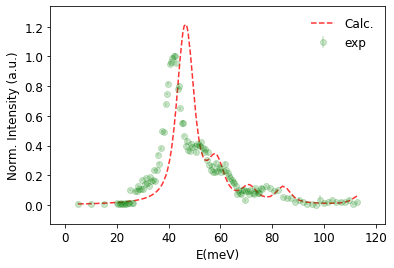

In [8]:
print(TMGO.Chi2_INS(TMGO.PC_value), end='\n\n')
print(TMGO.eigensys()[0])

TMGO.Evaluate_pattern(dataset = 0, Plotcontrol=True);

##  Point Charge fit

Function 267 evaluated, Chi2_energy =    0.0999 ,  Chi2 =    0.6171                                                                                
Fitted FWHM = 2.7023826689728967
Fitted Point charge parameters:  [ 1.540089 59.641844  0.401642]
[  0.         0.283413  41.834584  41.834584  51.858582  51.858582
  63.48648   76.67226  106.97253  106.97253  116.44148  116.776237
 116.776237]


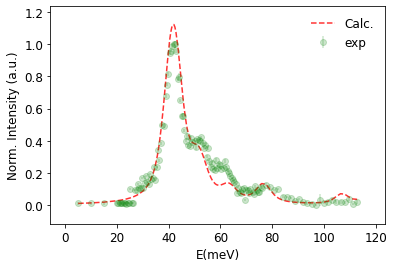

In [3]:
# do not fit FWHM

np.set_printoptions(precision=6)
TMGO.PCfit( TargetChi2energy= 0.1 )   # put TargetChi2energy to enforce the eigen-energies to be around obseved levels

TMGO.Evaluate_pattern(dataset = 0, Plotcontrol=True);
print('\nFitted FWHM =', TMGO.FWHM)
print('Fitted Point charge parameters: ', TMGO.PC_value)
print(TMGO.eigensys()[0])

In [4]:
TMGO.writefile("TMGO_PCfit_linearChi2.dat")

##  Steven Operator fit



Function 1086 evaluated, Chi2_energy =    0.0064 ,  Chi2 =    0.3280                                                                                1 evaluated, Chi2_energy =    0.1491 ,  Chi2 =    0.5867                                                                                 213 evaluated, Chi2_energy =    0.1366 ,  Chi2 =    0.4212                                                                                 237 evaluated, Chi2_energy =    0.1760 ,  Chi2 =    0.4196                                                                                 749 evaluated, Chi2_energy =    0.0067 ,  Chi2 =    0.3309                                                                                
Eigen energies are: [  0.          0.0850446  41.5747342  41.5747342  52.3116561  52.3116561
  61.6074437  78.1833888 105.7348488 105.7348488 122.8031207 122.8031207
 126.0266932] 

Fitted Bkq: 
 [[ 2.         0.        -0.3714916]
 [ 4.         0.        -0.0055482]
 [ 4.         3.         0.095

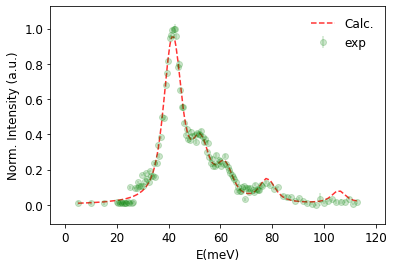

In [5]:
#read initial Bkq from point-charge calculation
TMGO.PC_value = np.array([1.6, 60, 0.5])
TMGO.simpre()
#TMGO.readBkq("TMGO_StevenOpfit_linearChi2.dat")

#start fit
TMGO.StevenOpfit() 

TMGO.Evaluate_pattern(dataset = 0, Plotcontrol=True);
print('\nEigen energies are: %s \n'% TMGO.eigensys()[0])
print('Fitted Bkq: \n', TMGO.Bkq)

In [6]:
TMGO.writefile("TMGO_StevenOpfit_linearChi2.dat", FitMethod='StevenOp')

##  Others

In [10]:
TMGO.readBkq("TMGO_PCfit_linearChi2.dat")
print('Akq (meV) =\n',CEF.BkqtoAkq(TMGO.Bkq,'Tm3+'))

Read Bkq successfully for  Tm3+ , Number of Steven Operator = 6 , in the unit of meV
[[ 2.          0.         -0.51813053]
 [ 4.          0.         -0.00313208]
 [ 4.          3.          0.11967995]
 [ 6.          0.         -0.0000328 ]
 [ 6.          3.          0.00008314]
 [ 6.          6.         -0.00030556]]
Akq (meV) =
 [[  2.           0.         -51.29492247]
 [  4.           0.         -19.18594755]
 [  4.           3.         733.11449372]
 [  6.           0.           5.85080496]
 [  6.           3.         -14.83036355]
 [  6.           6.          54.50524279]]
